# Introduction
In our project, we are trying to find the best neighborhood in Pittsburgh. We decided to rank neighborhoods by how good they are for biking.

# Metric 1

In [3]:
import pandas as pd
import geopandas
%matplotlib inline
data = pd.read_csv("traffic_count.csv")

trafficCount = data.groupby("neighborhood").mean()["average_daily_car_traffic"]
trafficCount = trafficCount.sort_values(ascending=True)
print(trafficCount)

neighborhood
South Side Flats            115.0
Lincoln Place               126.0
Lincoln-Lemington-Belmar    195.0
Fineview                    419.0
Allegheny West              477.0
                            ...  
South Oakland                 NaN
South Shore                   NaN
Swisshelm Park                NaN
Troy Hill                     NaN
Upper Lawrenceville           NaN
Name: average_daily_car_traffic, Length: 74, dtype: float64


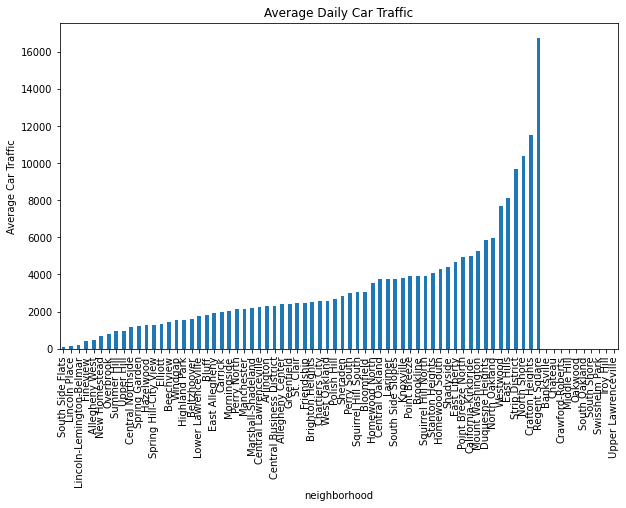

In [4]:
trafficCount.plot(kind = 'bar',
              ylabel = 'Average Car Traffic',
              figsize=(10, 6),
              title = "Average Daily Car Traffic")

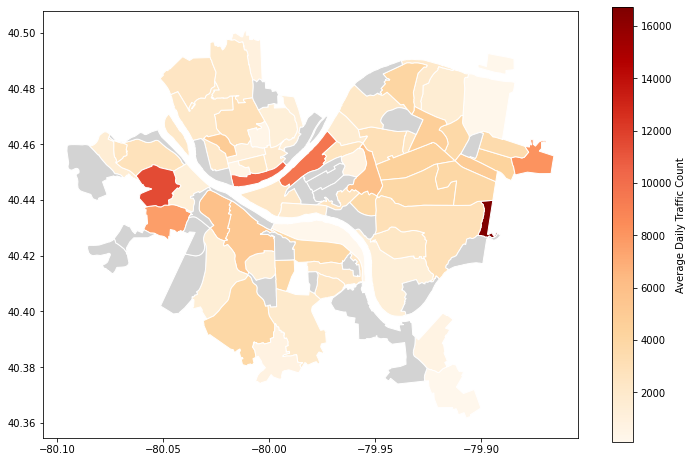

In [12]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp") # read in the shapefile
traffic_map = neighborhoods.merge(trafficCount, how='left', left_on='hood', right_on='neighborhood')
traffic_map.plot(column = "average_daily_car_traffic",
              cmap='OrRd',
               edgecolor="white", 
               legend=True,             
               legend_kwds={'label': "Average Daily Traffic Count"}, 
               figsize=(12, 8),
               missing_kwds={"color": "lightgrey"})

### Conclusion
After my analysis I came to the conclusion that the best neighborhood to live in if you want as least traffic as possible is South Side Flats. It came in first with a traffic count of 115 bike rental racks. Coming in second place is Lincoln Place with 126 daily average traffic count. Lastly, coming in at third is Lincoln-Lemington-Belmar with 195 as its daily average traffic count.

# Metric 2

In [5]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

# A list of all bike paths
bikes = pd.read_csv("bike_pavement_markings.csv") 
bikes.head(67)

,Project ID,Year Added,Street,Cross Streets,Type,Protected Bike Lane,Street Distance (Miles),Bike Lane Distance (Miles),Shared Lane Marking Distance (Miles),Removed bike lane,Removed sharrow,Unnamed: 11,Unnamed: 12,Neighborhood
0,1,1980,Resevoir Dr,Loop,Bike Lane,NaN,1.10,1.10,NaN,NaN,NaN,NaN,NaN,Highland Park
1,2,1980,Riverview Dr,Loop,Bike Lane,NaN,2.15,2.15,NaN,NaN,NaN,NaN,NaN,Perry North
2,3,1983,Beechwood Ave,Fifth Ave/Saline St,Bike Lane,NaN,3.71,7.42,NaN,NaN,NaN,NaN,NaN,Squirrel Hill North
3,4,2007,Liberty Ave,Ligonier St/Baum Blvd,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,Lower Lawrenceville
4,5,2007,Birmingham Bridge,E Carson St/Fifth/Forbes,Bike Lane,NaN,0.60,1.20,NaN,NaN,NaN,NaN,NaN,Southside
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,36,2015,Bigelow,O'Hara to Schenley,NaN,NaN,0.20,0.40,NaN,NaN,NaN,NaN,NaN,Central Oakland
62,37,2015,O'Hara Bigelow Bayard,DeSoto to Morewood,Bl/SH,NaN,1.10,1.60,0.6,NaN,NaN,NaN,NaN,Central Oakland
63,38,2015,Schenley Drive,Schenley Drive Extension to Bigelow,Protected,x,0.20,0.40,NaN,NaN,NaN,NaN,NaN,Central Oakland
64,37,2015,East Street,Lareda street to Suffolk,Bike Lane,NaN,0.50,1.00,NaN,NaN,NaN,NaN,NaN,Spring Hill - City View


In [6]:
bikes = pd.read_csv("bike_pavement_markings.csv") 
bike_distance = bikes.groupby("Neighborhood").sum()['Bike Lane Distance (Miles)']
bike_distance.sort_values(ascending=False)

Neighborhood
Squirrel Hill North        10.36
Central Oakland             6.11
Allegheny Center            3.40
Lower Lawrenceville         3.40
Perry North                 2.55
Southside                   2.30
Downtown                    1.90
East Liberty                1.85
Larimer                     1.80
Greenfield                  1.16
Highland Park               1.10
Point Breeze North          1.00
Spring Hill - City View     1.00
Bloomfield                  0.80
Point Breeze                0.52
Upper Lawrenceville         0.50
North Shore                 0.38
Polish Hill                 0.30
North Oakland               0.23
Shadyside                   0.00
Homewood West               0.00
Fineview                    0.00
Strip District              0.00
Troy Hill                   0.00
Name: Bike Lane Distance (Miles), dtype: float64

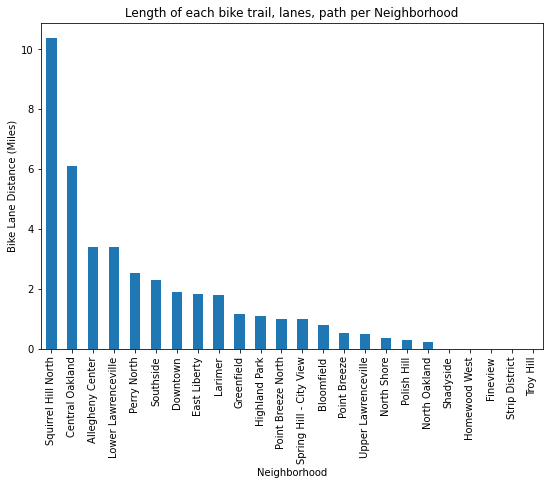

In [7]:
count = bikes["Neighborhood"].value_counts()
bike_distance = bikes.groupby("Neighborhood").sum()['Bike Lane Distance (Miles)']
bike_distance = bike_distance.sort_values(ascending=False)
bike_distance.plot(kind='bar',
                  ylabel = 'Bike Lane Distance (Miles)',
                  figsize=(9,6),
                  title = "Length of each bike trail, lanes, path per Neighborhood")

In [ ]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

Displays where the longest bike trails, paths, and lanes are in Pittsburgh per neighborhood
- Squirrel Hill North
- Central Oakland
- Allegheny Center
- Lower Lawrenceville

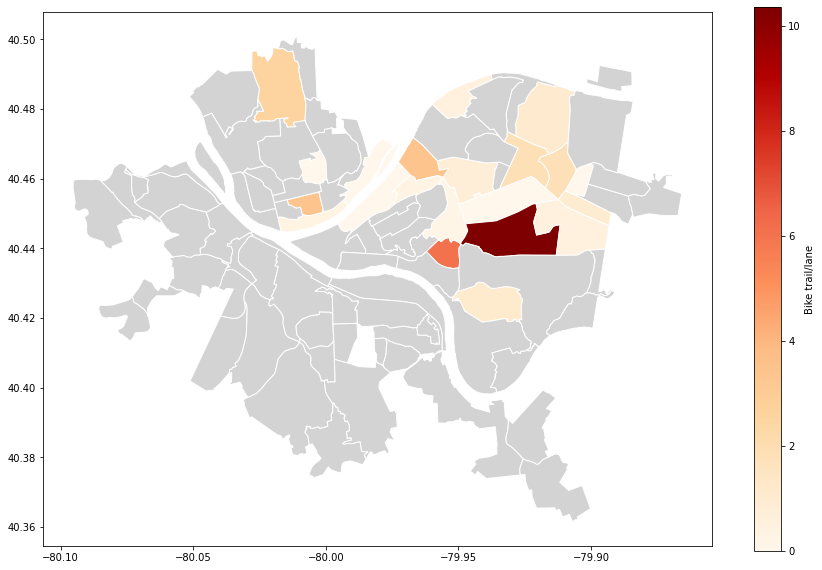

In [13]:
bike_map = neighborhoods.merge(bike_distance, how='left', left_on='hood', right_on='Neighborhood')
bike_map.plot(column = "Bike Lane Distance (Miles)", 
               cmap='OrRd',              
               edgecolor="white",       
               legend=True,        
               legend_kwds={'label': "Bike trail/lane"},
               figsize=(15, 10),     
               missing_kwds={"color": "lightgrey"}) 

In conclusion, Squirrel Hill North is the best place in Pittsburgh to be a biker due to the longer bike trails, lanes, and paths. Squirrel Hill North has a total length for its bike lanes, paths, and trails of 10.36 miles. Central Oakland was the runner-up for this top spot with a total length of 6.11 miles. Tied for third were Lower Lawrenceville and Allegheny Center with a total length of 3.40 miles.

# Metric 3

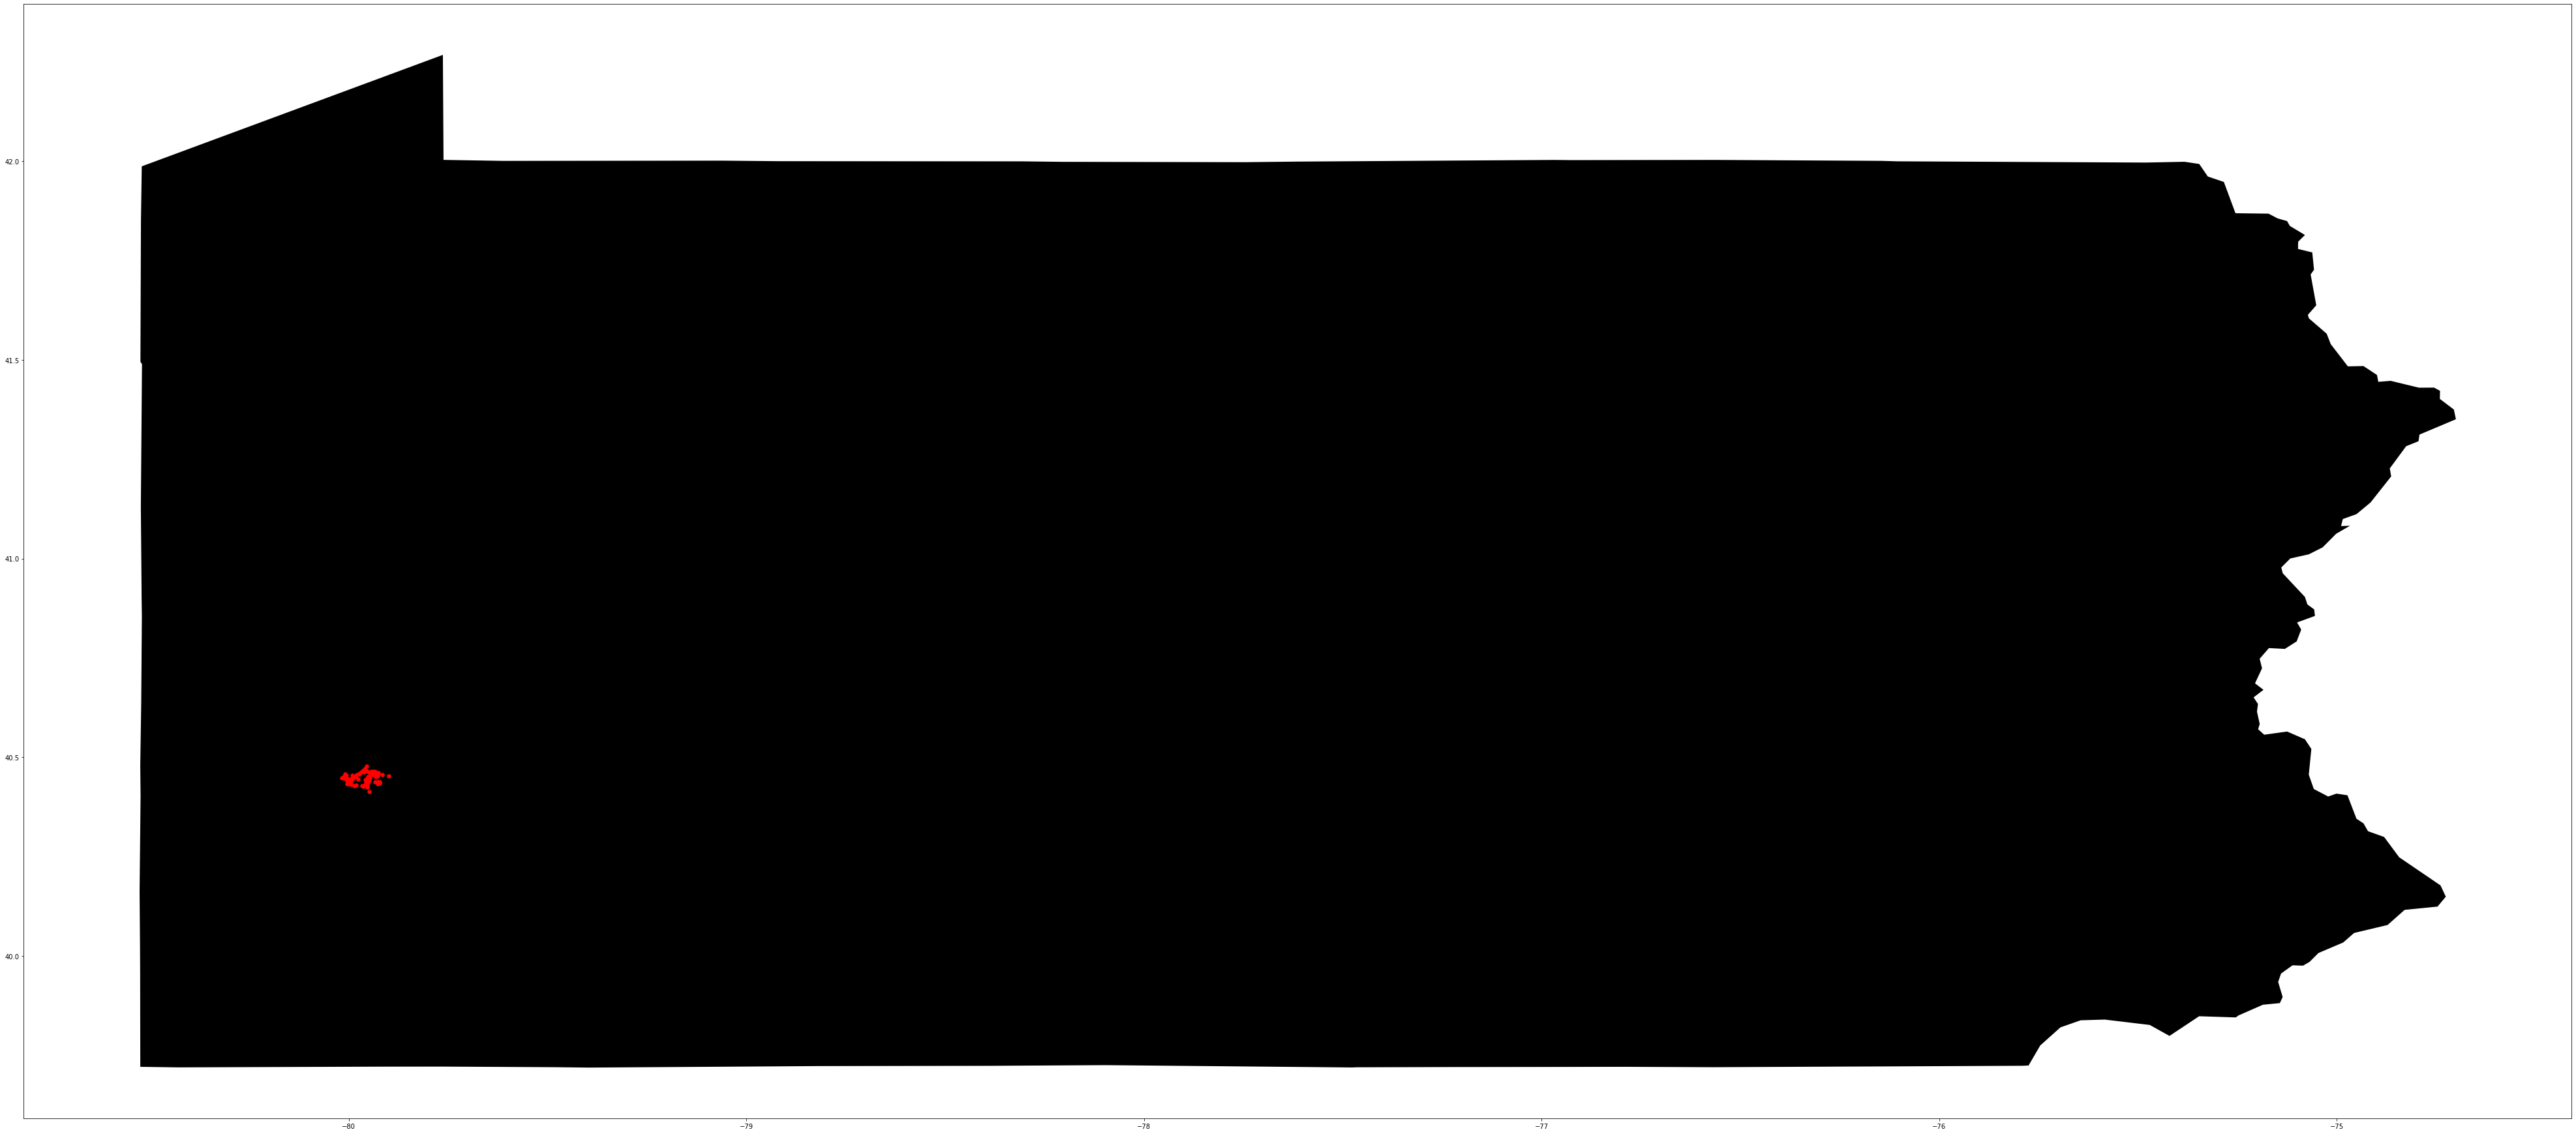

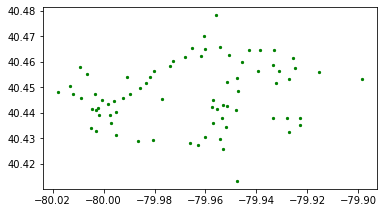

In [8]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data = pd.read_csv("pbs.csv")
usa = gpd.read_file("states.shp")
base = usa[usa.STATE_ABBR == "PA"].plot(color='black', figsize=(70,70))
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))
gdf.plot(ax=base, color='red', markersize = 30)

gdf.plot(color='green', markersize = 5)

North Shore - 1012 [31],1013 [15]

East Allegheny - 49801 [6]

Strip District - 1017 [18]

Downtown - 1000 [16],1001 [19],49691 [10]

Uptown - 1005 [13],1004 [15]

North Oakland - 1093 [6],1041 [19],1036 [18],1095 [7],1034 [15]

Oakland Square Historic District - 1044 [19]

Squirrel Hill North - 1033 [19],1024 [17]

Shadyside - 1029 [19],1026 [13],1025 [15]

Bakery Square - 1028 [8]

Point Breeze North - 1066 [8]

Mt Washington - 1082 [7],1072 [10]

Lower Lawrenceville - 	49951 [6],1019 [17],1021 [19]

South Side Flats - 1048 [16],1045 [19],1084 [10]

# Conclusion

**Process:** For my metric, I used a dataframe that showed the location of stations, and the number of racks at each station. The dataframe did not show the neighborhood; it only had points of longitude and latitude. WIth these points, I decided to use geopandas, which is a form of pandas that allows you to plot such points on a map, much like plotting points on a graph. Unfortunately, I wasn’t able to get an accurate geopandas-applicable map of the Pittsburgh area. The smallest map I could find was of the entirety of Pennsylvania, which isn’t small enough to clearly see all the points and where exactly they are. Instead, I decided to use the interactive map they had on the site which showed the locations of the bike stations. Then, I grouped the stations by neighborhood and  counted the number of racks each station had, adding them together to find the most optimal neighborhood for biking (and finding bikes). North Oakland had the most stations and the most racks, so it won the best neighborhood.

**Best Neighborhood/Conclusion:** North Oakland had the most stations and the most racks, so it won the best neighborhood. My personal favorite neighborhood was North Oakland anyway because of the amount of stations and area to bike, so it didn’t differentiate.